Train shape: (593994, 13)
Test shape: (254569, 12)

--- Target Distribution ---
loan_paid_back
1.0    0.79882
0.0    0.20118
Name: proportion, dtype: float64


C:\Users\nelma\AppData\Local\Temp\ipykernel_65412\2765129825.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val_counts.index, y=val_counts.values, palette="viridis")


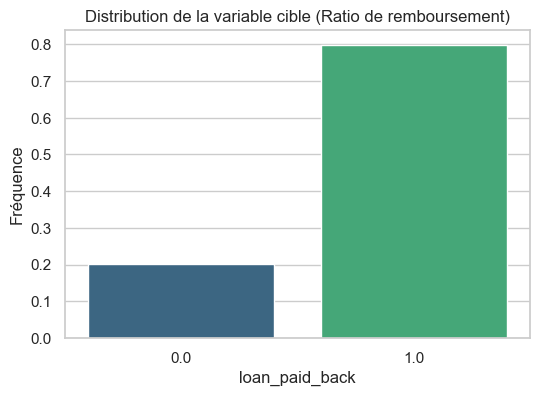


Super nouvelle : Aucune valeur manquante (Clean Dataset !)


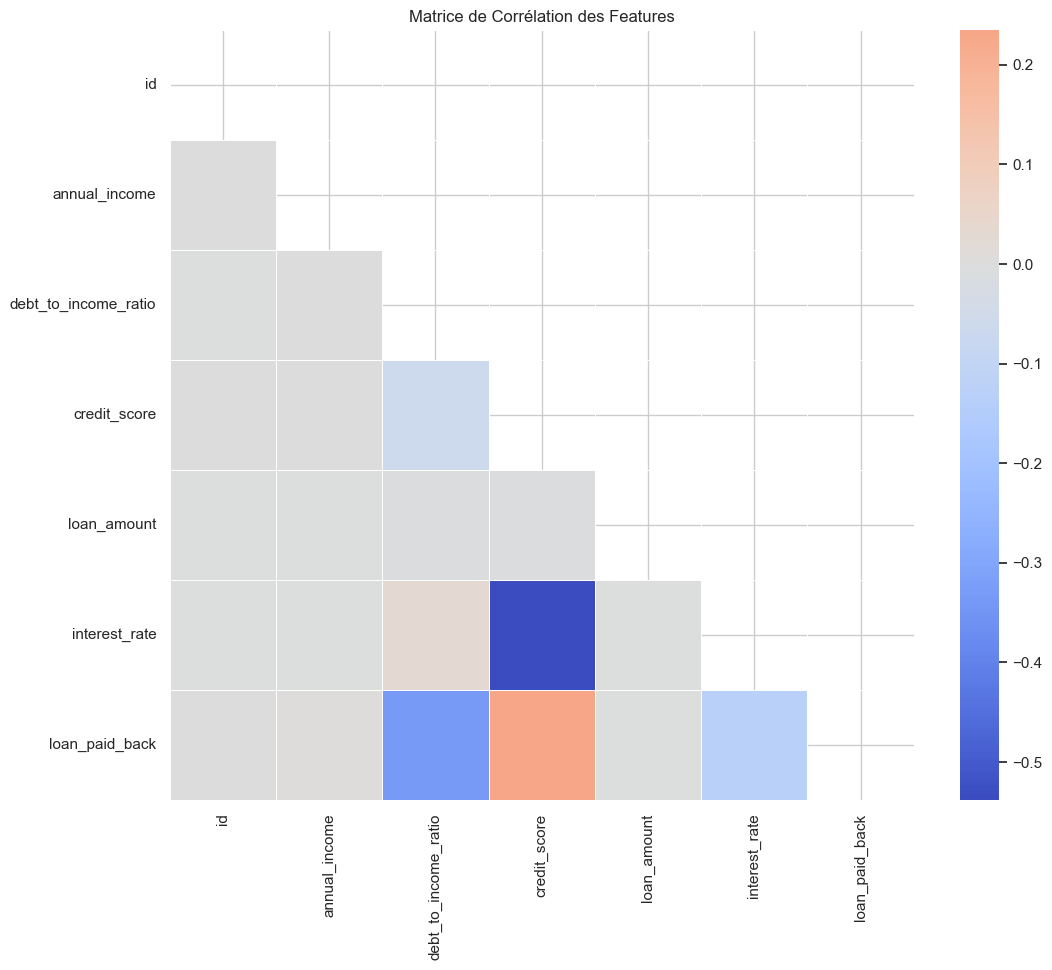


--- Top corrélations avec la Target ---
loan_paid_back          1.000000
credit_score            0.234560
annual_income           0.006326
id                      0.001387
loan_amount            -0.003762
interest_rate          -0.131184
debt_to_income_ratio   -0.335680
Name: loan_paid_back, dtype: float64


In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration pour le style "Pro"
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

# Chargement des données (chemin relatif depuis le dossier notebooks)
TRAIN_PATH = "../data/raw/train.csv"
TEST_PATH = "../data/raw/test.csv"

df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)

print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")

# --- 1. Vérification de la Target (loan_paid_back) ---
target_col = 'loan_paid_back'
if target_col in df_train.columns:
    val_counts = df_train[target_col].value_counts(normalize=True)
    print("\n--- Target Distribution ---")
    print(val_counts)
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x=val_counts.index, y=val_counts.values, palette="viridis")
    plt.title("Distribution de la variable cible (Ratio de remboursement)")
    plt.ylabel("Fréquence")
    plt.show()
else:
    print(f"Attention: La colonne {target_col} n'est pas trouvée.")

# --- 2. Vérification des valeurs manquantes ---
missing = df_train.isnull().sum()
missing = missing[missing > 0]
if not missing.empty:
    print("\n--- Valeurs manquantes ---")
    print(missing.sort_values(ascending=False))
    # Visualisation des manquants
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
    plt.title("Carte des valeurs manquantes")
    plt.show()
else:
    print("\nSuper nouvelle : Aucune valeur manquante (Clean Dataset !)")

# --- 3. Corrélations (Numériques uniquement) ---
# On ne prend que les colonnes numériques pour la matrice de corrélation
numeric_cols = df_train.select_dtypes(include=[np.number]).columns
corr_matrix = df_train[numeric_cols].corr()

plt.figure(figsize=(12, 10))
# Masque pour cacher la moitié supérieure (redondante)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Matrice de Corrélation des Features")
plt.show()

# Afficher les corrélations les plus fortes avec la target
print("\n--- Top corrélations avec la Target ---")
print(corr_matrix[target_col].sort_values(ascending=False).head(10))